In [3]:
import pandas as pd
import time
import sys
import datetime as datetime

#Indlæs data og formater dato formatet
df_1pt= pd.read_pickle('both1.pkl')
df_2pt= pd.read_pickle('both2.pkl')
AL_df=df_1pt.append(df_2pt)
                    #AL_df0["date"]=pd.to_datetime(AL_df0["date"], unit='s', errors='coerce')
                    #AL_df=AL_df0[(AL_df0['date'] < '2010-01-01')]
AL_df.set_index(pd.DatetimeIndex(AL_df['date']), inplace=True)
del AL_df['date']
AL_df

,job_title,job_describ,city,company
date,,,,
2009-12-31,ABB - Salgsingeniør / Lavspændingskomponenter ...,Til vores krævende og kompetente kunder som be...,Region Midtjylland,ABB A/S
2009-12-31,ABB - Salgsingeniør / Lavspændingskomponenter ...,På et marked hvor virksomheden i forvejen er e...,Region Midtjylland,ABB A/S
2009-12-31,ABB - Salgsingeniør / Lavspændingskomponenter ...,På et marked hvor virksomheden i forvejen er e...,Sydjylland,ABB A/S
2009-12-31,ABB - Salgsingeniør / Lavspændingskomponenter ...,Til vores krævende og kompetente kunder som be...,Region Nordjylland,ABB A/S
2009-12-31,ABB - Salgsingeniør / Lavspændingskomponenter ...,Til vores krævende og kompetente kunder som be...,Sydjylland,ABB A/S
2009-12-31,ABB - Salgsingeniør / Lavspændingskomponenter ...,På et marked hvor virksomheden i forvejen er e...,Region Nordjylland,ABB A/S
2009-12-31,Stud.jur. med interesse for personalejura,Du skal være med i et team der arbejder med pe...,Kgs. Lyngby,BRFkredit a/s
2009-12-31,Leder til bofællesskab,Til bofællesskabet Ganerbo i Skjern søges enga...,Skjern,Bofællesskabet Ganerbo
2009-12-31,Account Manager - Service Provider (English/Da...,The SP challenger & New Media team is seeking ...,København,Cisco


      TIME  GDP, BILLIONS OF DKK
0   2008Q1                 459.5
1   2008Q2                 475.6
2   2008Q3                 463.6
3   2008Q4                 470.6
4   2009Q1                 439.4
5   2009Q2                 442.4
6   2009Q3                 439.5
7   2009Q4                 456.3
8   2010Q1                 435.5
9   2010Q2                 452.6
10  2010Q3                 453.5
11  2010Q4                 469.4
12  2011Q1                 446.9
13  2011Q2                 462.9
14  2011Q3                 452.7
15  2011Q4                 472.7
16  2012Q1                 449.4
17  2012Q2                 461.2
18  2012Q3                 456.7
19  2012Q4                 472.1
20  2013Q1                 448.4
21  2013Q2                 467.6
22  2013Q3                 462.1
23  2013Q4                 478.4
24  2014Q1                 456.4
25  2014Q2                 469.9
26  2014Q3                 471.4
27  2014Q4                 488.8
28  2015Q1                 466.4
29  2015Q2

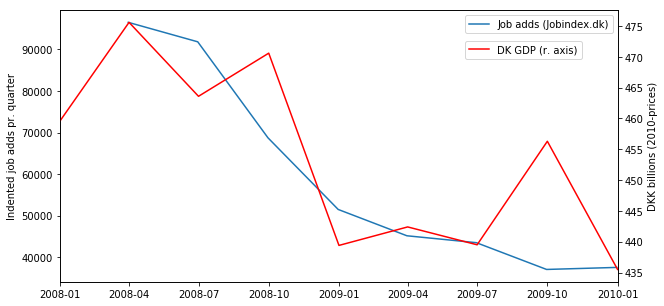

<Figure size 432x288 with 0 Axes>

In [467]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


#Gruppering af datoer pr. kvartal samt udarbejdelse af graf

g_1 = AL_df.groupby(pd.Grouper(freq="Q"))  # DataFrameGroupBy (grouped by quaters)
quater_frq=g_1.count()['city']


# BNP ukorrigerede faste priser
AL_BNP=pd.read_csv('C:/Users/ander/Desktop/group19/Eksamensprojekt/dst/test.csv')
bnp=AL_BNP.iloc[:,4:6]
print(bnp)
bnp=bnp[(bnp['TIME']<'2010Q2')]
bnp.set_index(pd.DatetimeIndex(bnp['TIME']), inplace=True)
del bnp['TIME']


#Figure for kvartalsvis BNP + Jobindex (Fig.3)
fig, ax1 =plt.subplots(figsize=(10,5))

ax2 = ax1.twinx()
ax1.plot(quater_frq, label='Job adds (Jobindex.dk)')
ax1.legend(loc="upper right")
ax2.plot(bnp, label='DK GDP (r. axis)', color='r',)
ax2.legend(loc=[0.727,0.82])
ax1.set_ylabel("Indented job adds pr. quarter")
ax2.set_ylabel("DKK billions (2010-prices)")
plt.xlim(['2008-01','2010-01'])
plt.savefig('Fig3.png')
plt.show()



In [4]:
#Annoncer i alt efter vsh.
from collections import Counter
import time
t0=time.time()
AL_d=AL_df.head(10000)

count  = pd.Series(AL_d['company'].str.split(',').map(Counter).sum())
firmadict=count.to_dict()
t1=time.time()
round(t1-t0,1)

12.9

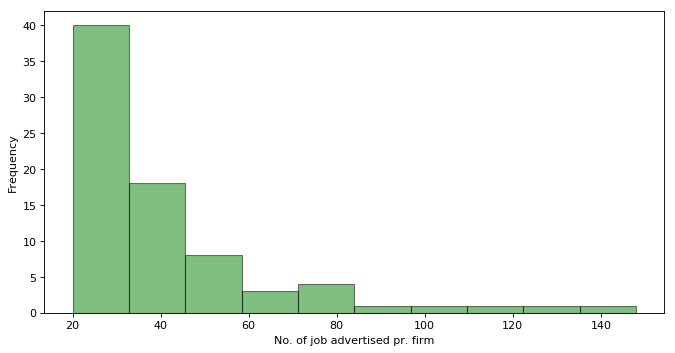

In [62]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


firmadict['Novo Nordisk A/S']
max(firmadict.values())
n_jobs=count.sort_values(ascending=False)
job_count=n_jobs[n_jobs>=20]

#Creating a histogram
figure(num=None, figsize=(10, 5), dpi=80, facecolor='w', edgecolor='b')
plt.xlabel('No. of job advertised pr. firm')
plt.ylabel('Frequency')
plt.hist(job_count, bins=10, alpha=0.5,color='g', histtype='bar', ec='black')
plt.savefig('Fig4.png')
plt.show() 


In [465]:
#Gruppering gruppering mht. Vsh og dato
pd.options.display.max_rows=1200


tickers={'MAERSK_A':'CSE3200','MAERSK_B':'CSE3201','CARL_B':'CSE1596','CHR':'CSE75663',\
         'COLO_B':'CSE3203','DANSKE':'CSE1586','DSV':'CSE3415','FLS':'CSE3207','GEN':'CSE11143',\
         'GN':'CSE3205','ISS':'CSE80901','JYSK':'CSE1587','NDA_DKK':'CSE4861','NOVO_B':'CSE1158',\
         'NZYM_B':'CSE11273','PNDORA':'CSE77855','TRYG':'CSE31315','VWS':'CSE3258','WDH':'CSE3247'}

List=['Maersk','Carlsb', 'Colopla','Danske Ba','DSV','FLSmid',\
     'GN','Jyske B','Nordea','Novo N','Novozy','Vestas' ]           

#EVT. lundbeck - H. Lun
#Evt. Alm. B
#Evt G4S
#EVT Rockwool
#EVT SAS

#str[0:3]=='DSV'   #Carlsberg børnhave=2 #str[0:9]=='Danske Ba'
#str[0:6]=='Genmab' (25 forekomster i alt), 
#!!Tryg forkerte forekomster (Tryg i Danmark smba,Tryg Byg, Trygg-Hansa, TrygFlytning, Tryggevælde provsti, TryghedsPlejen)!!
# - TrygV=12 forekosmter, Tryg F=262 og i alt 298
#William D. er et Holding og datterselsaberne søger uafhængigt af hinanden. ISS+ Chr. Hansen + Pandora blev børs introduceret efter vore speriode
#GN  har mange døtre - ej GN PRODUCTION A/S=4  + Termolux og Production og

C20list=AL_df[AL_df['company'].astype(str).str[0:3]=='SAS']
gg = C20list.groupby(pd.Grouper(freq="M")) # DataFrameGroupBy (grouped by Month)
month_frq=gg.count()['company']
print(C20list['company'])
print(len(C20list))


date
2008-01-31    35
2008-02-29    36
2008-03-31    24
2008-04-30    34
2008-05-31     6
2008-06-30    15
2008-07-31    16
2008-08-31    11
2008-09-30    10
2008-10-31    13
2008-11-30    17
2008-12-31     2
2009-01-31     5
2009-02-28     3
2009-03-31     6
2009-04-30     6
2009-05-31     8
2009-06-30     9
2009-07-31     6
2009-08-31     3
2009-09-30     6
2009-10-31     6
2009-11-30     9
2009-12-31     8
Freq: M, Name: company, dtype: int64
date
2009-12-22                                                  SAS
2009-12-09                                            SAS Group
2009-12-09                                            SAS Group
2009-12-09                                            SAS Group
2009-12-02                                    SAS Institute A/S
2009-11-16                                            SAS Group
2009-11-11                                        SAS Institute
2009-11-10                                        SAS Institute
2009-10-29                       